In [8]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [9]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [10]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [11]:
df.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Replace ham with 0 and spam with 1
df = df.replace(['ham','spam'],[0, 1]) 

In [13]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df['Count']=0
for i in np.arange(0,len(df.v2)):
    df.loc[i,'Count'] = len(df.loc[i,'v2'])

In [15]:
df.head()

,v1,v2,Count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
# Total ham(0) and spam(1) messages
df['v1'].value_counts()

v1
0    4825
1     747
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
 2   Count   5572 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 130.7+ KB


In [18]:
corpus = []
ps = PorterStemmer()

In [19]:
# Original Messages

print (df['v2'][0])
print (df['v2'][1])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...


Processing Messages

In [20]:
for i in range(0, 5572):

    # Applying Regular Expression
    
    '''
    Replace email addresses with 'emailaddr'
    Replace URLs with 'httpaddr'
    Replace money symbols with 'moneysymb'
    Replace phone numbers with 'phonenumbr'
    Replace numbers with 'numbr'
    '''
    msg = df['v2'][i]
    msg = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', df['v2'][i])
    msg = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', df['v2'][i])
    msg = re.sub('£|\$', 'moneysymb', df['v2'][i])
    msg = re.sub('\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenumbr', df['v2'][i])
    msg = re.sub('\d+(\.\d+)?', 'numbr', df['v2'][i])
    
    ''' Remove all punctuations '''
    msg = re.sub('[^\w\d\s]', ' ', df['v2'][i])
    
    if i<2:
        print("\t\t\t\t MESSAGE ", i)
    
    if i<2:
        print("\n After Regular Expression - Message ", i, " : ", msg)
    
    # Each word to lower case
    msg = msg.lower()    
    if i<2:
        print("\n Lower case Message ", i, " : ", msg)
    
    # Splitting words to Tokenize
    msg = msg.split()    
    if i<2:
        print("\n After Splitting - Message ", i, " : ", msg)
    
    # Stemming with PorterStemmer handling Stop Words
    msg = [ps.stem(word) for word in msg if not word in set(stopwords.words('english'))]
    if i<2:
        print("\n After Stemming - Message ", i, " : ", msg)
    
    # preparing Messages with Remaining Tokens
    msg = ' '.join(msg)
    if i<2:
        print("\n Final Prepared - Message ", i, " : ", msg, "\n\n")
    
    # Preparing WordVector Corpus
    corpus.append(msg)

				 MESSAGE  0

 After Regular Expression - Message  0  :  Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   

 Lower case Message  0  :  go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   

 After Splitting - Message  0  :  ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']

 After Stemming - Message  0  :  ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']

 Final Prepared - Message  0  :  go jurong point crazi avail bugi n great world la e buffet cine got amor wat 


				 MESSAGE  1

 After Regular Expression - Message  1  :  Ok lar    Joking wif u oni   

 Lower case Message  1  :  ok lar    joking wif u oni   

 After Splitting - Message  1  :  ['ok', 'lar', 'joking', 'wif', '

In [21]:
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()

Applying Classification

In [22]:
y = df['v1']
print (y.value_counts())

print(y[0])
print(y[1])

v1
0    4825
1     747
Name: count, dtype: int64
0
0


Encoding Labels

In [23]:
le = LabelEncoder()
y = le.fit_transform(y)

print(y[0])
print(y[1])

0
0


Splitting to Training and Testing DATA

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size= 0.20, random_state = 0)

Applying Guassian Naive Bayes

In [25]:
bayes_classifier = GaussianNB()
bayes_classifier.fit(xtrain, ytrain)

GaussianNB()

In [26]:
# Predicting
y_pred = bayes_classifier.predict(xtest)

Results

In [27]:
# Evaluating
cm = confusion_matrix(ytest, y_pred)

In [28]:
cm

array([[824, 125],
       [ 19, 147]], dtype=int64)

In [29]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(ytest, bayes_classifier.predict(xtest)))
print (classification_report(ytest, bayes_classifier.predict(xtest)))

Accuracy : 0.87085 


              precision    recall  f1-score   support

           0       0.98      0.87      0.92       949
           1       0.54      0.89      0.67       166

    accuracy                           0.87      1115
   macro avg       0.76      0.88      0.80      1115
weighted avg       0.91      0.87      0.88      1115



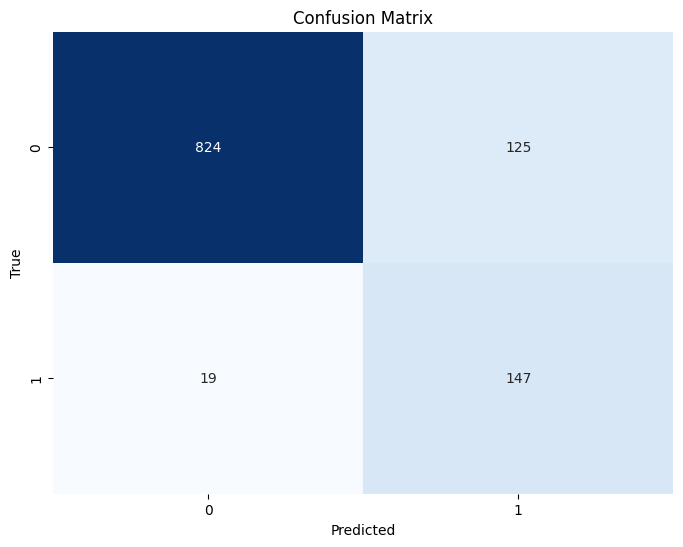

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Applying Decision Tree

In [31]:
dt = DecisionTreeClassifier(random_state=50)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=50)

In [32]:
# Predicting
y_pred_dt = dt.predict(xtest)

Results

In [33]:
# Evaluating
cm = confusion_matrix(ytest, y_pred_dt)

print(cm)

[[943   6]
 [ 29 137]]


In [34]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(ytest, dt.predict(xtest)))
print (classification_report(ytest, dt.predict(xtest)))

Accuracy : 0.96861 


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       949
           1       0.96      0.83      0.89       166

    accuracy                           0.97      1115
   macro avg       0.96      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115



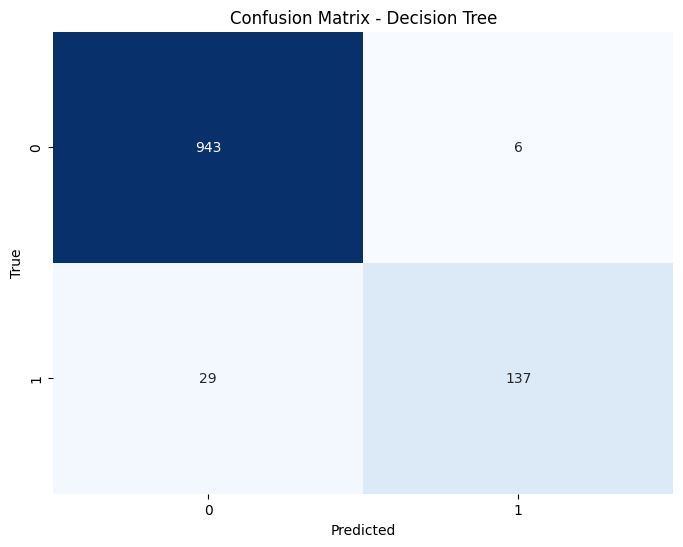

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm_dt = confusion_matrix(ytest, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()
